In [1]:
%%javascript #enables smooth scrolling in jupyter notebook
Jupyter.keyboard_manager.command_shortcuts.remove_shortcut('up');
Jupyter.keyboard_manager.command_shortcuts.remove_shortcut('down');

<IPython.core.display.Javascript object>

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Calculation of drought Indices (SPEI)

The standardized precipitation evaporation index is computed for the model data  and the CRU temperature and precipitation datasets (for calibration/validation).
I use the code from the climate indices package by James Adams (https://github.com/monocongo/climate_indices). **I run the climate indices package as a command line tool outside of this notebok!The commands to run in the command can also be found in this notebook**

I also tried running code snippets in the notebook, however this created some artefacts in the variance (which should be 1 for each grid cell according to the SPEI definition), so I've resorted to the easiest solution via the commandline.

Potential Evapotranspiration is estimated using the Thorthwaite method (due to the limited climate model variables we have.
Initially, it was also planned to compute the Palmer Drought Severity Index, however the code to this is extremely convoluted and also not vetted for use (the climate indices package). I got some weird results in the reconstructions so I decided to not investigate the use of PDSI further.


## SPEI calculation paramters
For the time scale I choose 12 months. The command line tool uses gamma and pearson distributions for the standardization (produces output for both), but I only use the Pearson distribution output

# Create terminal commands for climate indices package 

## Commands to be run in the terminal, make sure climate indices package is installed

In [106]:
commands=' '
for c in ['iHADCM3','ECHAM5','CESM','CCSM','GISS']:
    folder_path = '/home/mchoblet/paleoda/data/model_data/upsampled/'  # Replace with the path to your folder
    condition1 = c        # First condition substring  # List of second condition substrings
    condition2=['tsurf','prec']

    # Get all file names in the folder
    file_names = os.listdir(folder_path)
    # Filter the file names based on the conditions
    filtered_file_names = [name for name in file_names if condition1 in name and any(substr in name for substr in condition2)]
    # Create the list of full paths
    paths = [os.path.join(folder_path, name) for name in filtered_file_names]
    
    #paths[0]: tsurf
    #paths[1]: prec
    
    command="process_climate_indices --index spei --periodicity monthly --netcdf_precip <PRECIP> --var_name_precip prec --netcdf_temp <TSURF> --var_name_temp tsurf --output_file_base <C> --scales 12 --calibration_start_year 0851 --calibration_end_year 1849 --multiprocessing all"
    #path_save=paths[0].replace('tsurf','spei')
    if c=='CESM':
        command=command.replace('<PRECIP>',paths[0])
        command=command.replace('<TSURF>',paths[1])
    else:
        command=command.replace('<PRECIP>',paths[1])
        command=command.replace('<TSURF>',paths[0])
    command=command.replace('<C>',c)
    #! {command}
    commands+=command+';'
    print(command)
    print(' ')
    

process_climate_indices --index spei --periodicity monthly --netcdf_precip /home/mchoblet/paleoda/data/model_data/upsampled/iHADCM3_prec_801_1952.nc --var_name_precip prec --netcdf_temp /home/mchoblet/paleoda/data/model_data/upsampled/iHADCM3_tsurf_801_1952.nc --var_name_temp tsurf --output_file_base iHADCM3 --scales 12 --calibration_start_year 0851 --calibration_end_year 1849 --multiprocessing all
 
process_climate_indices --index spei --periodicity monthly --netcdf_precip /home/mchoblet/paleoda/data/model_data/upsampled/ECHAM5_prec_850_1849.nc --var_name_precip prec --netcdf_temp /home/mchoblet/paleoda/data/model_data/upsampled/ECHAM5_tsurf_850_1849.nc --var_name_temp tsurf --output_file_base ECHAM5 --scales 12 --calibration_start_year 0851 --calibration_end_year 1849 --multiprocessing all
 
process_climate_indices --index spei --periodicity monthly --netcdf_precip /home/mchoblet/paleoda/data/model_data/upsampled/CESM_prec_850_1850.nc --var_name_precip prec --netcdf_temp /home/mchobl

In [107]:
print(commands)

 process_climate_indices --index spei --periodicity monthly --netcdf_precip /home/mchoblet/paleoda/data/model_data/upsampled/iHADCM3_prec_801_1952.nc --var_name_precip prec --netcdf_temp /home/mchoblet/paleoda/data/model_data/upsampled/iHADCM3_tsurf_801_1952.nc --var_name_temp tsurf --output_file_base iHADCM3 --scales 12 --calibration_start_year 0851 --calibration_end_year 1849 --multiprocessing all;process_climate_indices --index spei --periodicity monthly --netcdf_precip /home/mchoblet/paleoda/data/model_data/upsampled/ECHAM5_prec_850_1849.nc --var_name_precip prec --netcdf_temp /home/mchoblet/paleoda/data/model_data/upsampled/ECHAM5_tsurf_850_1849.nc --var_name_temp tsurf --output_file_base ECHAM5 --scales 12 --calibration_start_year 0851 --calibration_end_year 1849 --multiprocessing all;process_climate_indices --index spei --periodicity monthly --netcdf_precip /home/mchoblet/paleoda/data/model_data/upsampled/CESM_prec_850_1850.nc --var_name_precip prec --netcdf_temp /home/mchoblet/

/home/mchoblet/paleoda/data/model_data/upsampled/iHADCM3_spei_gamma_01.nc


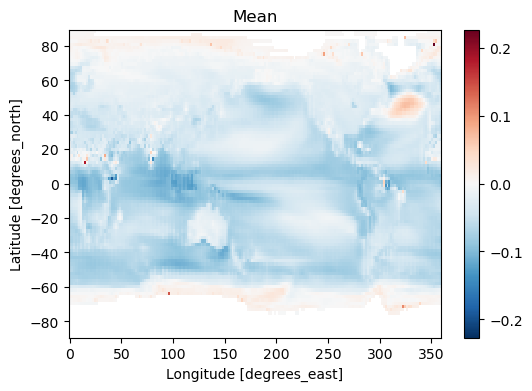

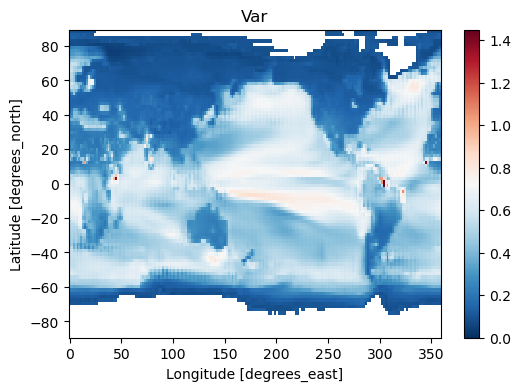

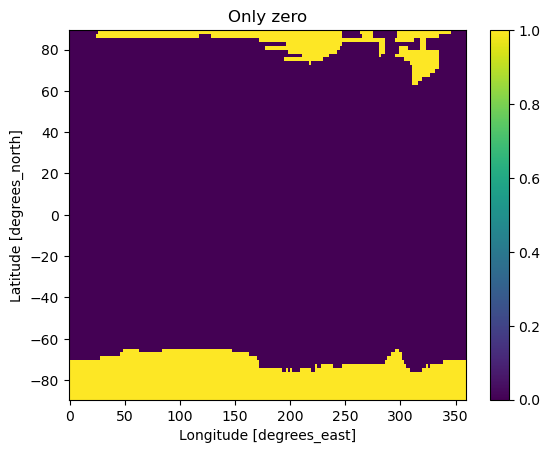

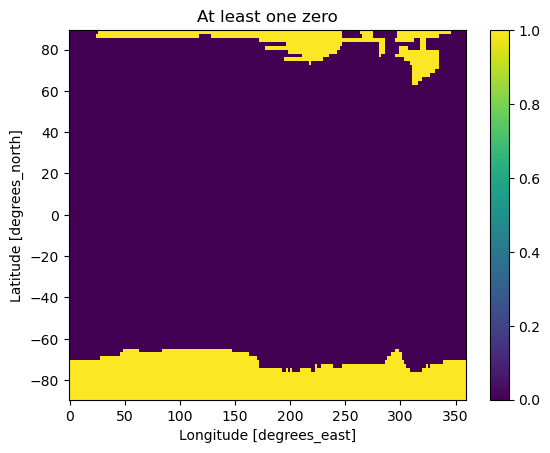

/home/mchoblet/paleoda/data/model_data/upsampled/ECHAM5_spei_gamma_01.nc


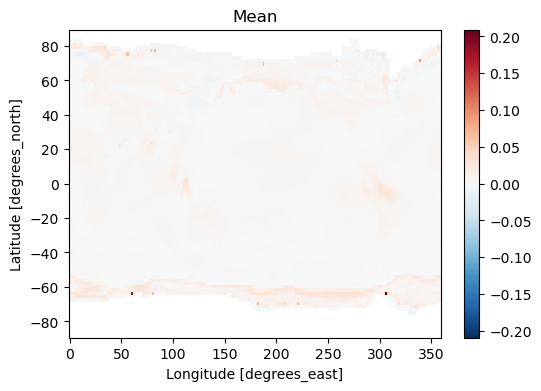

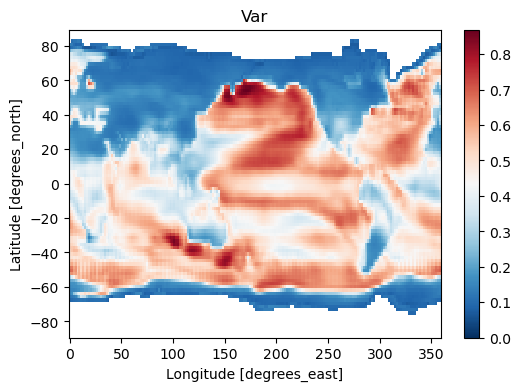

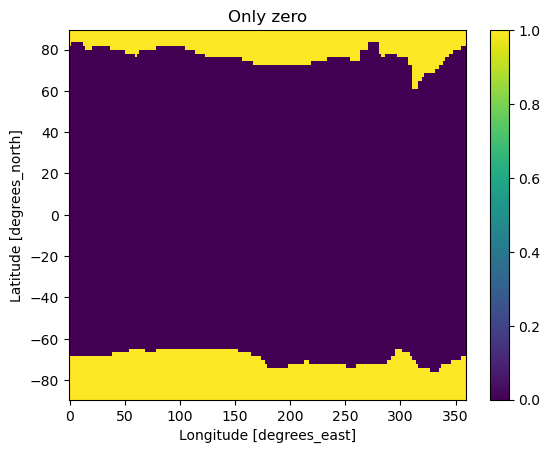

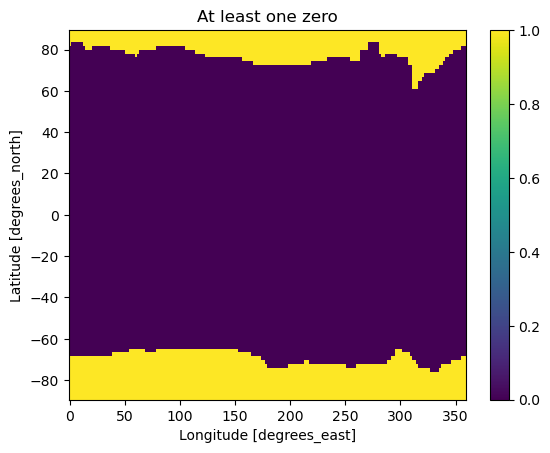

/home/mchoblet/paleoda/data/model_data/upsampled/CESM_spei_gamma_01.nc


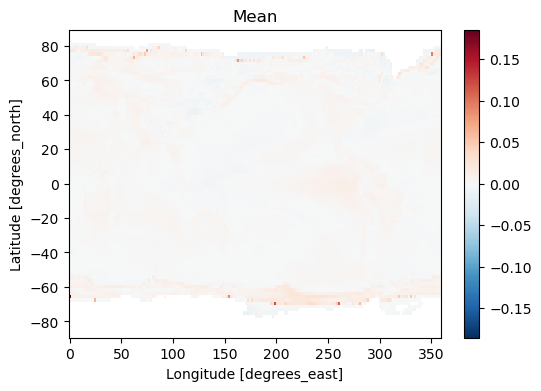

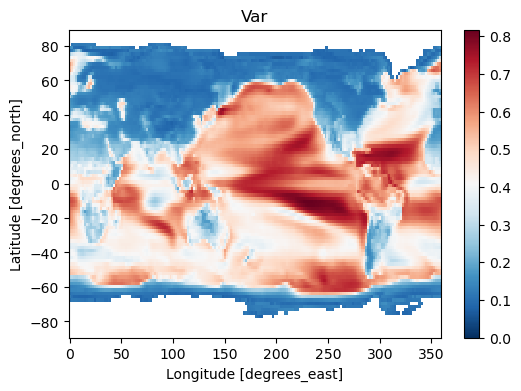

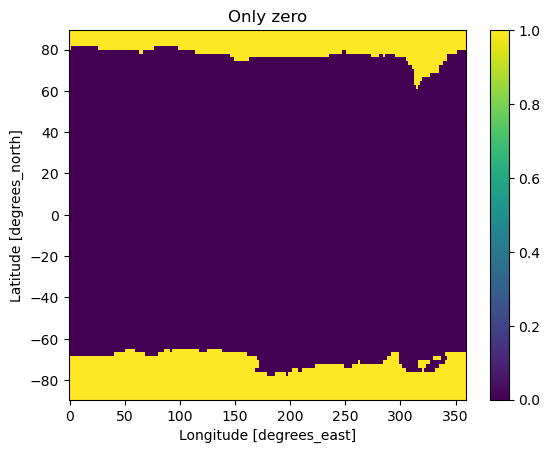

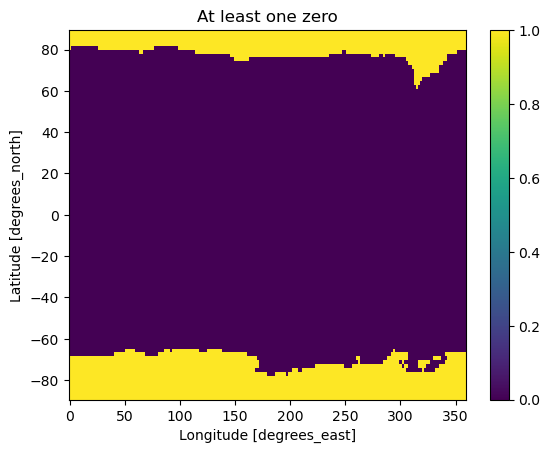

/home/mchoblet/paleoda/data/model_data/upsampled/CCSM_spei_pearson_01.nc


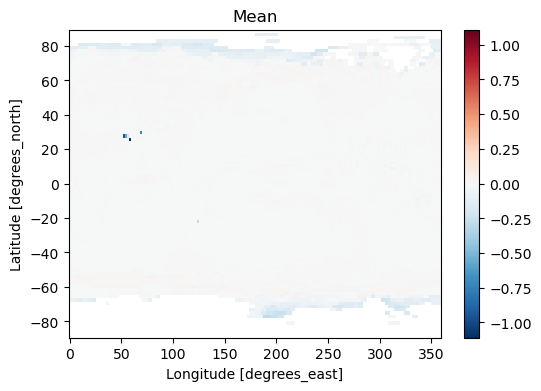

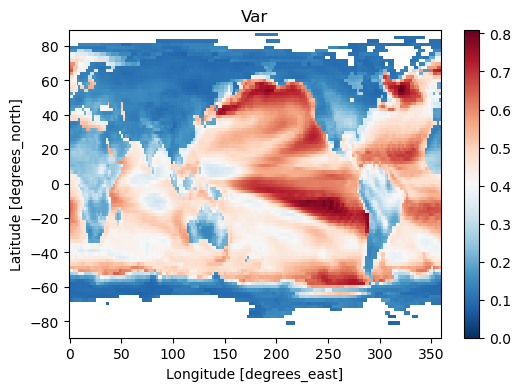

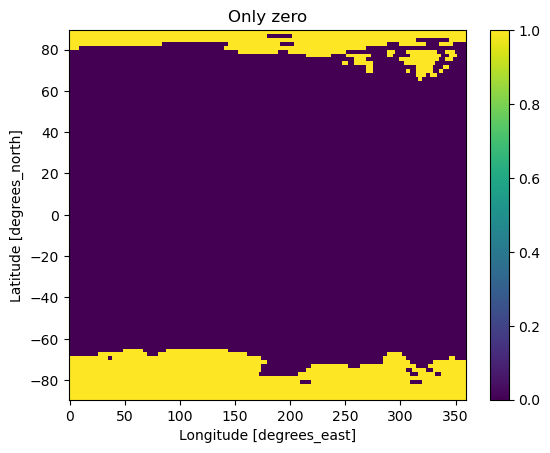

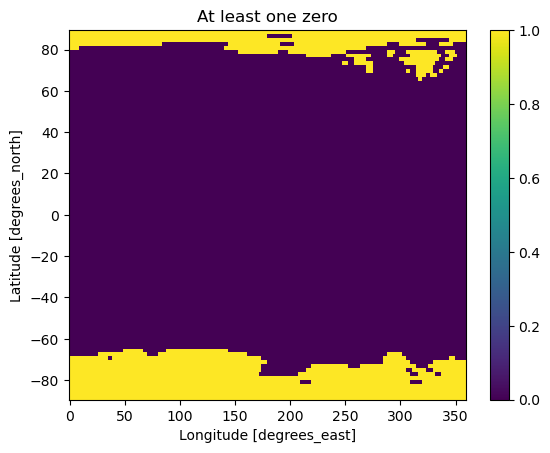

/home/mchoblet/paleoda/data/model_data/upsampled/GISS_spei_pearson_01.nc


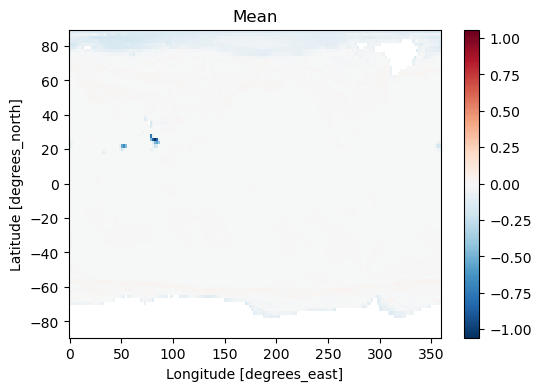

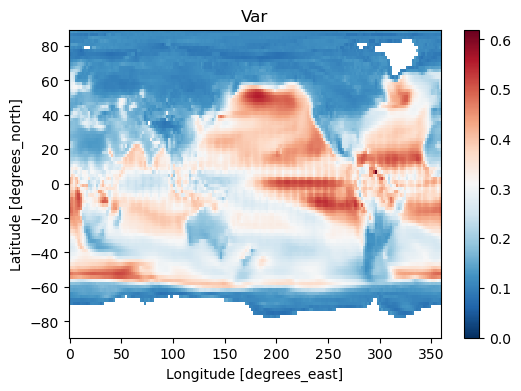

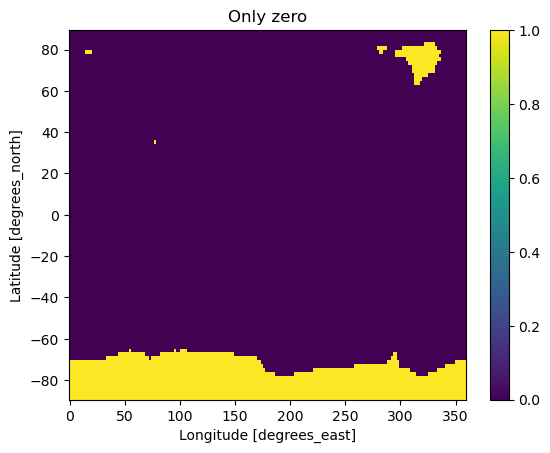

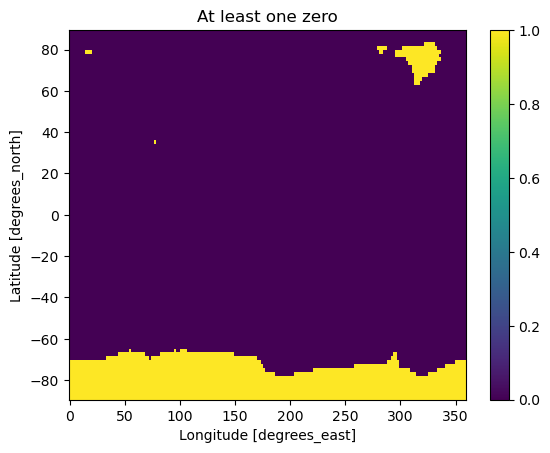

In [267]:
##checking output

st='1YS'
#st='1MS'
for c in ['iHADCM3','ECHAM5','CESM','CCSM','GISS']:
    folder_path = '/home/mchoblet/paleoda/data/model_data/upsampled/'  # Replace with the path to your folder
    condition1 = c        # First condition substring  # List of second condition substrings
    condition2=['spei_gamma','spei_pearson']

    # Get all file names in the folder
    file_names = os.listdir(folder_path)
    # Filter the file names based on the conditions
    filtered_file_names = [name for name in file_names if condition1 in name and any(substr in name for substr in condition2)]
    # Create the list of full paths
    paths = [os.path.join(folder_path, name) for name in filtered_file_names]
    
    #for p in paths:
    p=paths[0]
    print(p)
    data=xr.open_dataset(p).to_array().squeeze('variable').resample(time=st).mean('time')
    plt.figure(figsize=(6,4))
    data.mean('time').plot(cmap='RdBu_r')
    plt.title('Mean')
    plt.show()
    plt.figure(figsize=(6,4))
    data.var('time').plot(cmap='RdBu_r',vmin=0)
    plt.title('Var')
    plt.show()

    T=len(data.time)
    only_zero=data.isel(time=0)#.to_array().squeeze('variable')
    mask=np.count_nonzero(np.isnan(data),axis=-1)
    only_zero.data=(mask==T)
    only_zero.plot(vmin=0)
    plt.title('Only zero')
    plt.show()
    atleast_one=data.isel(time=0)#.to_array().squeeze('variable')
    atleast_one.data=(mask>0)
    atleast_one.plot(vmin=0)
    plt.title('At least one zero')
    plt.show()

        

# Command for SPEI calculated on CRU dataset:


process_climate_indices --index spei --periodicity monthly --netcdf_precip /home/mchoblet/validation_data/sa_project/upsampled/cru_prec.nc --var_name_precip pre --netcdf_temp /home/mchoblet/validation_data/sa_project/upsampled/cru_tsurf.nc --var_name_temp tmp --output_file_base CRU --scales 12 --calibration_start_year 1901 --calibration_end_year 2022 --multiprocessing all

## Code that was finally not used 

In [30]:
import numpy as np
import xarray as xr
import cftime

import matplotlib.pyplot as plt
import os
from scipy.stats import norm, fisk
from multiprocessing import Pool,cpu_count

####LEGACY when I computed the SPEI in the notebook instead of via command line (the latter is the safer thing to do.)

isogsm='/home/mchoblet/paleoda/data/model_data/CCSM_tsurf_851_1850.nc'

def PET(path_tsurf):
    """
    Using Thornthwaites method (see van der Schrier 2011/Vicente-Serrano 2010(SPEI paper) for a description of the steps performed here)
    Vicente-Serrano has more steps
    """
    data=xr.open_dataset(path_tsurf)['tsurf']
    #convert data to celsius
    if np.min(data)>0:
        data=data-273.15
    #stack data (z,time)
    stacked=data.stack(z=('lat','lon')).transpose('z','time')
    
    #compute heat index based on mean monthly temperature
    month_temp=stacked.groupby('time.month').mean(dim='time')
    #set temperature min to 0, else calculation breaks somewhere
    i=(np.clip(month_temp,0,None)/5)**1.514
    I=i.sum('month')
    m=6.75*10**(-7)*I**3-7.71*10**(-5)*I**2+1.79*10**(-2)*I+0.492
    
    div=stacked/I
    #eliminate influence of I==0
    mask=np.isinf(div).values
    div.values[mask]=0
    mask=np.isneginf(div).values
    div.values[mask]=0
    #div[div==-np.inf]=0
    
    ##correction factor
    ndm=stacked.time.dt.daysinmonth
    #get julian day of month center 
    julian_month=(stacked.time.dt.month-1)*30+15
    delta=0.4093*np.sin(2*np.pi/365*julian_month-1.405)
    lat_radians=stacked.lat/360*(2*np.pi)
    
    #unit for delta and phi in python?
    arg=np.outer(-np.tan(lat_radians),np.tan(delta))
    #clip values that are too large/small (basically for the poles, polar night)
    arg=np.clip(arg,-1,1)
    omega=np.arccos(arg)
    
    N=(24/np.pi)*omega
    K=(N/12)*(ndm.values/30)
    
    #PET calculation
    PET=16*K*(10*div)**m
    
    #edge cases (van der Schrier 2011)
    PET=PET.where(stacked>0,0)
    PET=PET.where(stacked<26.5,-414.85+32.24*stacked-0.43*stacked**2)
    
    return PET

def trafo(data):
    #fisk log-logistic distribution
    shape,loc,scale=fisk.fit(data) 
    cdf=fisk.cdf(data,shape,loc,scale)
    transformed=norm.ppf(cdf)
    return transformed



def SPEI(path_prec,path_tsurf,scale,weighting=None):
    """
    Compute SPEI as described in Vicente Serrano 2010.
    Currently only with thornwait potential evapotranspiration and log-logistic distribution 
    """
    pet_tho=PET(path_tsurf)

    prec=xr.open_dataset(path_prec)['prec']
    #set nans/values <0 to zero
    prec=xr.where(prec==np.nan,0,prec)
    prec=xr.where(prec<0,0,prec)

    prec_stack=prec.stack(z=('lat','lon')).transpose('z','time')

    #add offset to ensure all values are positive (for transform, as in https://github.com/monocongo/climate_indices/blob/master/src/climate_indices/indices.py)
    dif=prec_stack+1000-pet_tho

    #compute running mean. slice such that the first month is december (all values that are non-nan actually
    start=scale-dif.time[0].dt.month.values+1

    x=np.arange(scale)

    if weighting=='exp':
        def func(x): return np.exp(x)/np.sum(np.exp(x))
    elif weighting=='exp2':
        def func(x): return np.exp(x**2)/np.sum(np.exp(x**2))
    elif weighting=='linear':
        def func(x): return x/np.sum(x)
        
    if weighting==None:
        X=dif.rolling(time=scale).mean()[:,start:]
    else:    
        weights=xr.DataArray(func(x), dims=['window'])
        X=dif.rolling(time=scale).construct('window').dot(weights)[:,start:]

    #for each month and location, fit a dif to a distribution and transform it to a normal distribution.
    #this step is rudimentarily parallelized, as the fitting/distribution calculation stuff can not easily be vectorized (it does give a speed up ~15, else calculation would run for hours)
    #here use log-logistic as in Vicente-Serrano 2010
    from multiprocessing import Pool
    num_workers = cpu_count()  
    pool = Pool(num_workers)

    #for month in range(1,13):
    #    data=X.sel(time=X.time.dt.month.isin([month])).values
    data=X.values
    results = pool.map(trafo,data)
    # convert the results to a 2D array
    output = np.vstack(results)
    X.data=output

    return X.unstack()


def model_time_subselect(xarray,avg,check_nan=False):
    """
    
    Function which slices the model data according to the avg start month, 
    or a specific season that will be reconstructed.
    Can be used for the annual mean function or the precipitation weighting for the d18O
    (works a bit differently)
    """
    xarray=xarray.copy()
    xarray_time_copy=xarray.time

    #ugly hack for ihadcm3 where data is missing
    if check_nan:
        xarray=xarray.resample(time='MS').mean('time')
        print('Checking prior for all nans/zeros in a time stepp')
        for i,t in enumerate(xarray.time):
            x=xarray.sel(time=t)
            nans=np.count_nonzero(np.isnan(x))
            if nans>0:
                print('Only nans in year', t.values, '. Replaced values with previous year')
                xarray.loc[dict(time=t)]=xarray.isel(time=(i-1))
            #additional check, if alls zeros
            all_zeros = not np.any(x)
            if all_zeros:
                print('Only zeroes in year', t.values, '. Replaced values with previous year')
                xarray.loc[dict(time=t)]=xarray.isel(time=(i-1))
    
    if avg==None or avg=='None':
        #calculate mean
        # Calculate the numerator #here resample so that we correctly get out time dimension
        xarray = xarray.resample(time="YS").mean(dim='time')        
        #check beginning/end, full year?    
        fm=xarray_time_copy.time.dt.month[0] #first month
        lm=xarray_time_copy.time.dt.month[-1] #last month
        if fm!=1 and fm!=2:
            xarray=xarray.isel(time=slice(1,None))
        if lm!=12 and lm!=11:
            xarray=xarray.isel(time=slice(None,-1))

        #add info about mean type in attributes
        xarray.attrs['Yearly mean type']='Standard January to December'
    
    #second case start month given (e.g. 4 for April to March averages)
    elif isinstance(avg,int): 
        #Slice the start
        #get first year/month
        fm=xarray.time.dt.month[0].values
        years=np.unique(xarray.time.dt.year.values)

        #first month in Array smaller than start month: slice from avg-month in first year
        #slicing on indices (assumes that no month is missing), else I would need to create a cftime.Datetime-object where I would also need to know the calendar type.
        #cal=xarray.time.to_index().calendar
        if fm<=avg:
            xarray=xarray.isel(time=slice(int(avg-fm),None))
        else:
            xarray=xarray.isel(time=slice(int(12-fm+avg),None))
        
        #Slice the End
        #last available month, needs to be==avg-1 (special case january=1 -> lm==12)
        lm=xarray.time.dt.month[-1].values
        #slice in last year
        if lm>=avg:
            xarray=xarray.isel(time=slice(None,int(avg-lm-1)))
        else:
            xarray=xarray.isel(time=slice(None,int(avg-lm-12-1)))
        
    elif isinstance(avg,np.ndarray) | isinstance(avg,list):
        """
        calculate average for months given in list (e.g [4,5,6], [11,12,1], ...)
        WARNING: If a month is just not existent, this will go wrong (just using coarsen method)
        ENHANCEMENT: find a better way to do this
        """
        assert np.ndim(np.squeeze(avg))==1, "<avg> invalid, can be None, integer (1-12) or 1-d list/nd.array"
        #make sure avg is a list
        avg=list(avg)

        #Time-Slice
        #BEGINNING
        fm=xarray.time.dt.month[0]
        years=np.unique(xarray.time.dt.year.values)
        #start month in avg sequence
        sm=avg[0]
        #is start month included in first year?
        #cal=xarray.time.to_index().calendar

        #first month in Array smaller than start month: slice from avg-month in first year
        if fm<=sm:
            xarray=xarray.isel(time=slice(int(sm-fm),None))
        #slice in second year
        else:
            xarray=xarray.isel(time=slice(int(12-fm+sm),None))

        #Slice the End
        #last available month, needs to be==avg-1
        lm=xarray.time.dt.month[-1].values
        #month to end with
        em=avg[-1]
        #slice in last year
        if lm>em:
            #if last month in prior larger than end month in avg slice from the end
            xarray=xarray.isel(time=slice(None,int(em-lm)))
        elif lm<em:
            #else go one year further back
            xarray=xarray.isel(time=slice(None,int(em-lm-12)))
            
        if len(xarray.dims)>1:
            xarray=xarray[xarray.time.dt.month.isin(avg),:,:] #(where extremely slow)
        else:
            xarray=xarray[xarray.time.dt.month.isin(avg)]

    return xarray

def annual_mean(xarray,avg,check_nan=False):
    """
    #NEW for paper.
    #main part of function has been outsource to model_time_subselect
    #spei slowness issue: fortunately not an issue for the model data
    TAKE ANNUAL/SEASONAL MEAN
    """
    xarray_attrs_copy=xarray.attrs
    name=xarray.name
    xarray=model_time_subselect(xarray,avg)
    
    if isinstance(avg,int) or len(avg)==1:
         xarray=xarray.coarsen(time=12,boundary='trim').mean('time') #Not resample! Else I get too many values here
    elif isinstance(avg,np.ndarray) | isinstance(avg,list):
        xarray=xarray.coarsen(time=len(avg),boundary='trim').mean('time')
        #the label is set to the center entry (would prefer left, but ok)
    
    #to be sure to always have the beginning of the year in the time axis
    xarray=xarray.resample(time="YS",closed='left',label='left').mean()

        
    #add original attributes (get lost throughout the process)
    xarray.attrs=xarray_attrs_copy
    xarray=xarray.rename(name)
    
    
    
    #for safety reasons. On Annual means, this takes about half a second, so its acceptable. 
    check_nan=True
    if check_nan:
        print('Checking prior for all nans/all zeros at one time step')
        for i,t in enumerate(xarray.time):
            x=xarray.sel(time=t)
            nans=np.count_nonzero(np.isnan(x))
            if nans>0:
                #print('Dropped year', t.values, 'due to nans')
                #xarray=xarray.where(xarray.time!=t, drop=True)
                print('Only nans in year', t.values, '. Replaced values with previous year')
                xarray.loc[dict(time=t)]=xarray.isel(time=(i-1))
            #additional check, if alls zeros
            all_zeros = not np.any(x) #if any value is !=0 (no matter if float/int), this is true (and thus false with not)
            if all_zeros:
                print('Only zeroes in year', t.values, '. Replaced values with previous year')
                xarray.loc[dict(time=t)]=xarray.isel(time=(i-1)) 
    
    return xarray

"""
path_prec='/home/mchoblet/paleoda/data/model_data/upsampled/ECHAM5_prec_850_1849.nc'
path_tsurf='/home/mchoblet/paleoda/data/model_data/upsampled/ECHAM5_tsurf_850_1849.nc'
#scale=1
#spei_echam_1=SPEI(path_prec,path_tsurf,scale,weighting='exp')
scale=12
spei_echam_12=SPEI(path_prec,path_tsurf,scale,weighting=None)

path_prec='/home/mchoblet/paleoda/data/model_data/upsampled/CCSM_prec_851_1850.nc'
path_tsurf='/home/mchoblet/paleoda/data/model_data/upsampled/CCSM_tsurf_851_1850.nc'
#scale=1
#spei_isogsm_1=SPEI(path_prec,path_tsurf,scale,weighting='exp')
scale=12
spei_isogsm_12=SPEI(path_prec,path_tsurf,scale,weighting=None)

#spei_isogsm_12.unstack().to_dataset(name='spei').to_netcdf('/home/mchoblet/paleoda/data/model_data/CCSM_spei_852_1850.nc')


path_prec='/home/mchoblet/paleoda/data/model_data/upsampled/CESM_prec_850_1850.nc'
path_tsurf='/home/mchoblet/paleoda/data/model_data/upsampled/CESM_tsurf_850_1850.nc'
#scale=1
#spei_cesm_1=SPEI(path_prec,path_tsurf,scale,weighting='exp')
scale=12
spei_cesm_12=SPEI(path_prec,path_tsurf,scale,weighting=None)
#spei_cesm_12.unstack().to_dataset(name='spei').to_netcdf('/home/mchoblet/paleoda/data/model_data/CESM_spei_851_1850.nc')


path_prec='/home/mchoblet/paleoda/data/model_data/upsampled/GISS_prec_850_1849.nc'
path_tsurf='/home/mchoblet/paleoda/data/model_data/upsampled/GISS_tsurf_850_1849.nc'
#scale=1
#spei_giss_1=SPEI(path_prec,path_tsurf,scale,weighting='exp')
scale=12
spei_giss_12=SPEI(path_prec,path_tsurf,scale,weighting=None)

####SPECIAL PROCEDURE for iHADCM3 due to missing data ....


path_prec='/home/mchoblet/paleoda/data/model_data/upsampled/iHADCM3_prec_801_1952.nc'
path_tsurf='/home/mchoblet/paleoda/data/model_data/upsampled/iHADCM3_tsurf_801_1952.nc'

prec=xr.open_dataset(path_prec)['prec']
tsurf=xr.open_dataset(path_tsurf)['tsurf']

xarray=prec
xarray=xarray.resample(time='1M').mean()
for i,t in enumerate(xarray.time):
    x=xarray.sel(time=t)
    nans=np.count_nonzero(np.isnan(x))
    if nans>0:
        #print('Dropped year', t.values, 'due to nans')
        #xarray=xarray.where(xarray.time!=t, drop=True)
        print('Only nans in month', t.values, '. Replaced values with month of previous year')
        xarray.loc[dict(time=t)]=xarray.isel(time=(i-12))
prec=xarray

xarray=tsurf
xarray=xarray.resample(time='1M').mean()
for i,t in enumerate(xarray.time):
    x=xarray.sel(time=t)
    nans=np.count_nonzero(np.isnan(x))
    if nans>0:
        #print('Dropped year', t.values, 'due to nans')
        #xarray=xarray.where(xarray.time!=t, drop=True)
        print('Only nans in year', t.values, '. Replaced values with month of previous year')
        xarray.loc[dict(time=t)]=xarray.isel(time=(i-12))
tsurf=xarray

data=tsurf
#convert dat to celsius
data=data-273.15
#stack data (z,time)
stacked=data.stack(z=('lat','lon')).transpose('z','time')

#compute heat index based on mean monthly temperature
month_temp=stacked.groupby('time.month').mean(dim='time')
#set temperature min to 0, else calculation breaks somewhere
i=(np.clip(month_temp,0,None)/5)**1.514
I=i.sum('month')
m=6.75*10**(-7)*I**3-7.71*10**(-5)*I**2+1.79*10**(-2)*I+0.492

div=stacked/I
#eliminate influence of I==0
mask=np.isinf(div).values
div.values[mask]=0
mask=np.isneginf(div).values
div.values[mask]=0
#div[div==-np.inf]=0

##correction factor
ndm=stacked.time.dt.daysinmonth
#get julian day of month center 
julian_month=(stacked.time.dt.month-1)*30+15
delta=0.4093*np.sin(2*np.pi/365*julian_month-1.405)
lat_radians=stacked.lat/360*(2*np.pi)

#unit for delta and phi in python?
arg=np.outer(-np.tan(lat_radians),np.tan(delta))
#clip values that are too large/small (basically for the poles, polar night)
arg=np.clip(arg,-1,1)
omega=np.arccos(arg)

N=(24/np.pi)*omega
K=(N/12)*(ndm.values/30)

#PET calculation
pet=16*K*(10*div)**m

#edge cases (van der Schrier 2011)
pet=pet.where(stacked>0,0)
pet=pet.where(stacked<26.5,-414.85+32.24*stacked-0.43*stacked**2)

scale=12

#set nans/values <0 to zero
prec=xr.where(prec==np.nan,0,prec)
prec=xr.where(prec<0,0,prec)

prec_stack=prec.stack(z=('lat','lon')).transpose('z','time')

#add offset to ensure all values are positive (for transform, as in https://github.com/monocongo/climate_indices/blob/master/src/climate_indices/indices.py)
dif=prec_stack+1000-pet

#compute running mean. slice such that the first month is january (all values that are non-nan)
start=scale-dif.time[0].dt.month.values+1
x=np.arange(scale)
weighting='exp'
if weighting=='exp':
    def func(x): return np.exp(x)/np.sum(np.exp(x))
elif weighting=='exp2':
    def func(x): return np.exp(x**2)/np.sum(np.exp(x**2))
elif weighting=='linear':
    def func(x): return x/np.sum(x)
weights=xr.DataArray(func(x), dims=['window'])
X=dif.rolling(time=scale).construct('window').dot(weights)[:,start:]

#TO-DO: Compute X with weights as in PHYDA (<- reason for that not so clear to me)
#Description what to do https://stackoverflow.com/questions/48510784/xarray-rolling-mean-with-weights, K.Fujii:
#weight = xr.DataArray([0.25, 0.5, 0.25], dims=['window'])
#da.rolling(dim_0=3, center=True).construct('window').dot(weight)

#for each month and location, fit a dif to a distribution and transform it to a normal distribution.
#this step is rudimentarily parallelized, as the fitting/distribution calculation stuff can not easily be vectorized (it does give a speed up ~15, else calculation would run for hours)
#here use log-logistic as in Vicente-Serrano 2010
from multiprocessing import Pool
num_workers = cpu_count()  
pool = Pool(num_workers)

#for month in range(1,13):
#    data=X.sel(time=X.time.dt.month.isin([month])).values
data=X.values
results = pool.map(trafo,data)
# convert the results to a 2D array
output = np.vstack(results)
X.data=output
    
spei_ihadcm3_12=X.unstack()

ihadcm3_sets=helper(spei_ihadcm3_12)
ihadcm3_spei=xr.merge(ihadcm3_sets)

#save them into the upsampled folders -> I will only use these ones in the reconstruction

#note that spei starts one year later!!
giss_sets.to_netcdf('/home/mchoblet/paleoda/data/model_data/upsampled/GISS_spei_851_1849.nc')
ihadcm3_spei.to_netcdf('/home/mchoblet/paleoda/data/model_data/upsampled/iHADCM3_spei_802_1952.nc')
cesm_sets.to_netcdf('/home/mchoblet/paleoda/data/model_data/upsampled/CESM_spei_851_1850.nc')
isogsm_sets.to_netcdf('/home/mchoblet/paleoda/data/model_data/upsampled/CCSM_spei_852_1850.nc')
echam_spei.to_netcdf('/home/mchoblet/paleoda/data/model_data/upsampled/ECHAM5_spei_851_1849.nc')

"""